In [1]:
import pandas as pd
df = pd.read_csv("Crop_recommendation.csv")
print(df.isnull().sum())
print(df.info())
df.head()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


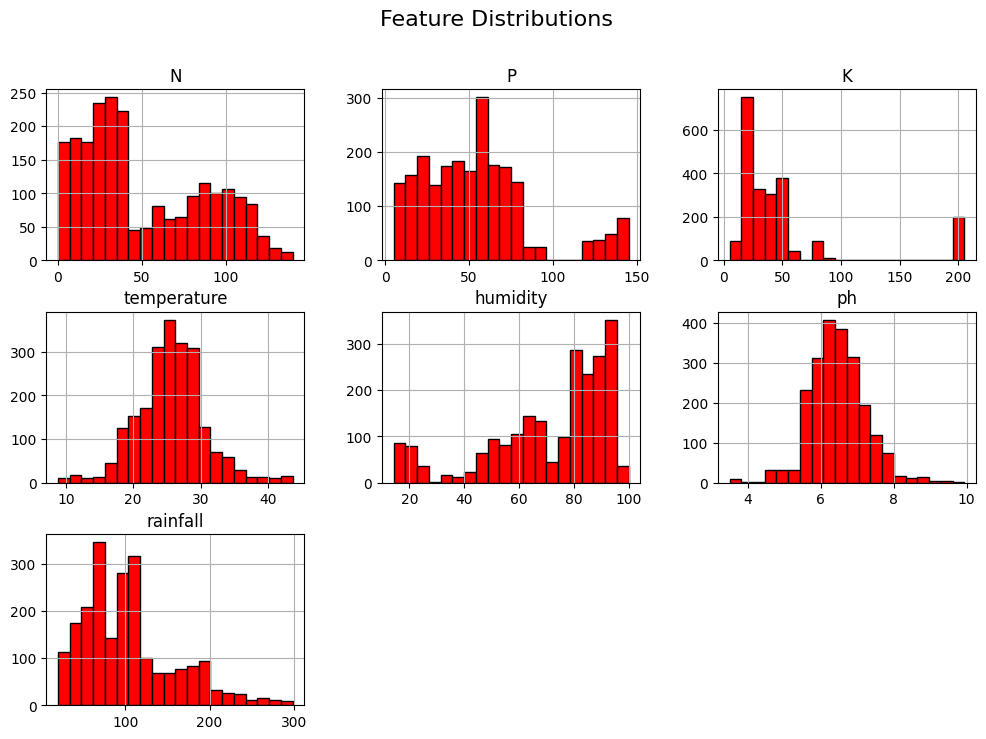

In [3]:
import matplotlib.pyplot as plt
df.drop(columns=['label']).hist(figsize=(12, 8),bins=20,color='red',edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<ipython-input-15-805c3cf89386>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='N', data=df, palette='pastel')


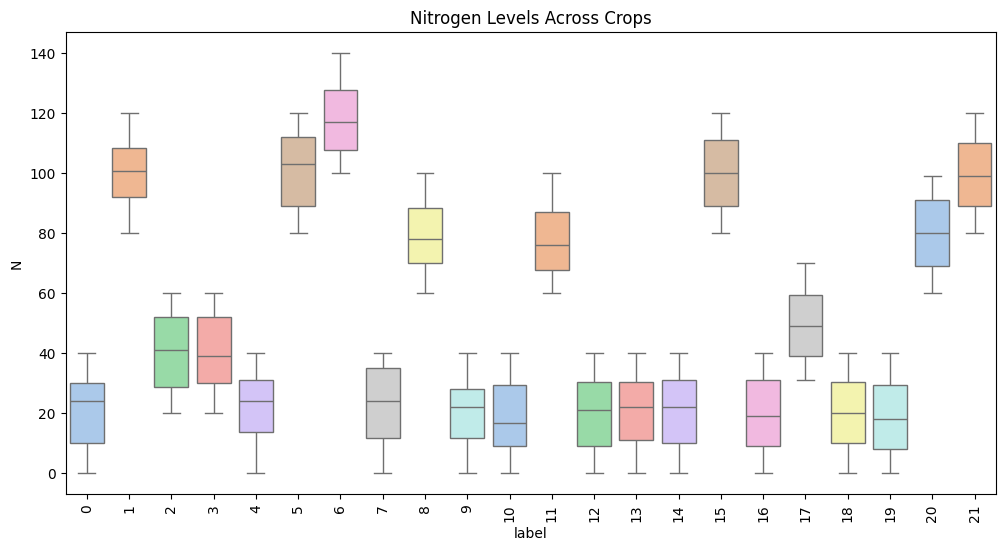

<ipython-input-15-805c3cf89386>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='P', data=df, palette='pastel')


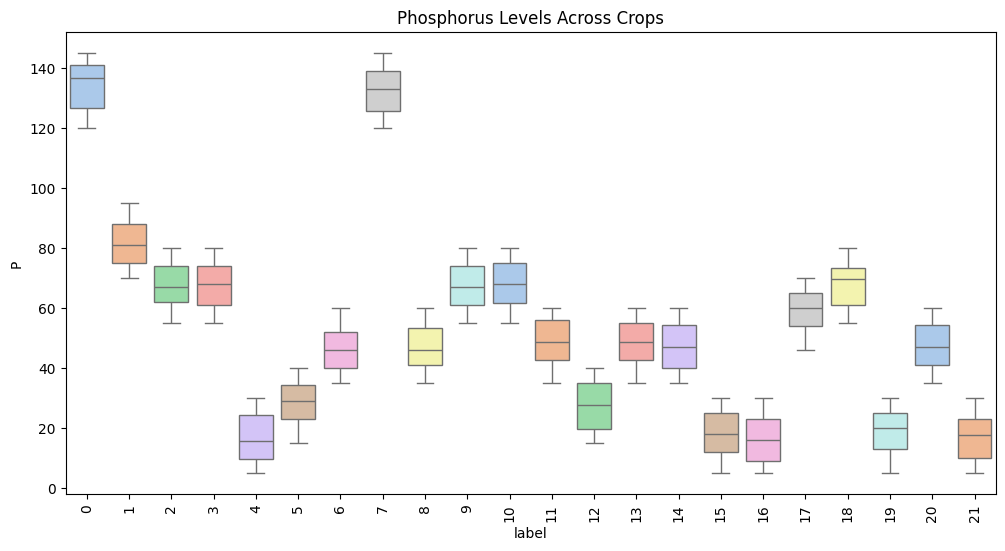

<ipython-input-15-805c3cf89386>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='K', data=df, palette='pastel')


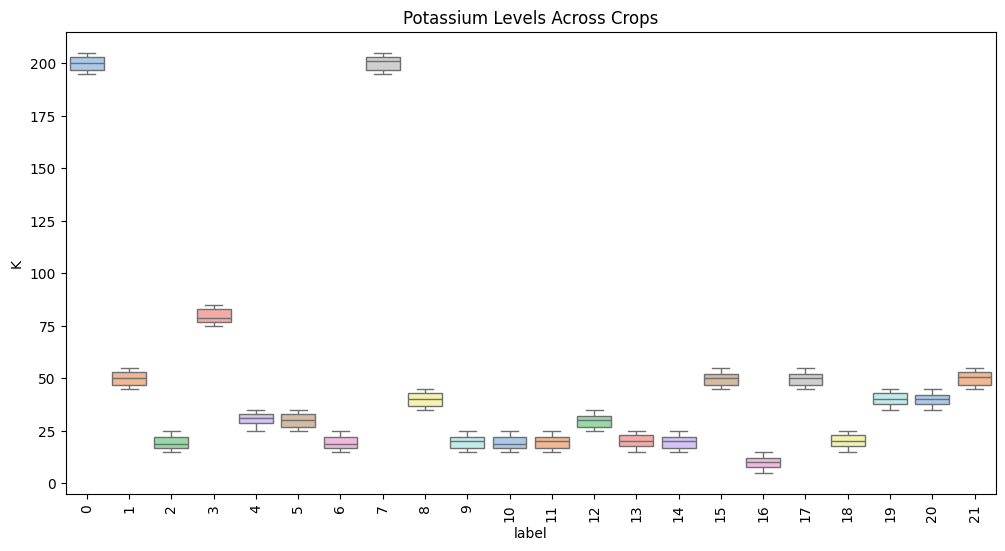

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N',data=df,palette='pastel')
plt.xticks(rotation=90)
plt.title("Nitrogen Levels Across Crops")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='label',y='P', data=df,palette='pastel')
plt.xticks(rotation=90)
plt.title("Phosphorus Levels Across Crops")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='label',y='K',data=df,palette='pastel')
plt.xticks(rotation=90)
plt.title("Potassium Levels Across Crops")
plt.show()


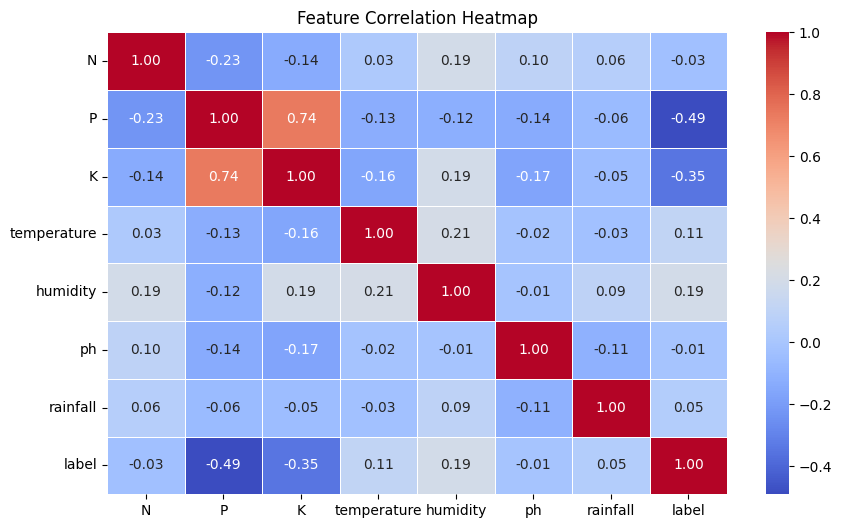

In [5]:
import numpy as np
df_encoded = df.copy()
df_encoded['label'] = df_encoded['label'].astype('category').cat.codes
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1760, 7)
Testing set shape: (440, 7)


In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
import pickle
with open("crop_recommendation_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9931818181818182


<ipython-input-10-db0d4a0f039e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


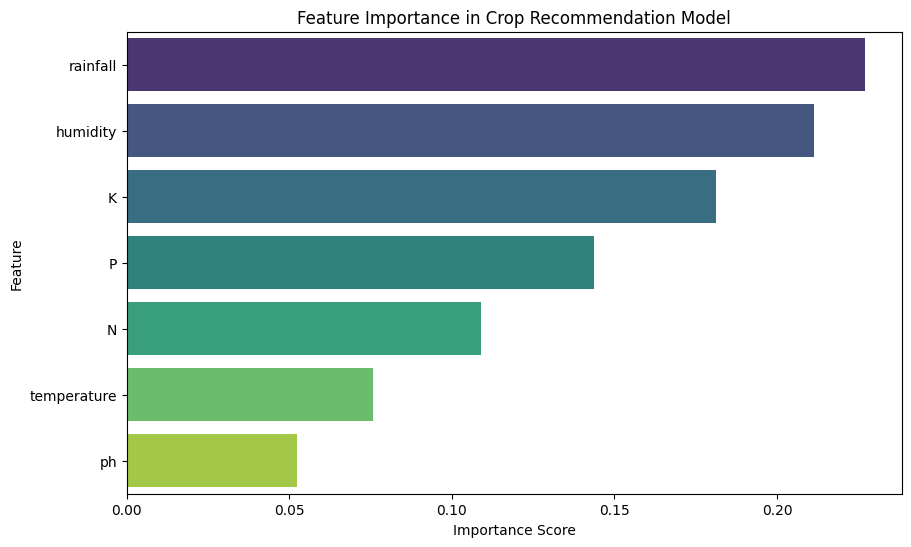

In [10]:
importances = model.feature_importances_
feature_names=X.columns
feature_importance_df=pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title("Feature Importance in Crop Recommendation Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [19]:
sample_input = np.array([[60 ,38,17,18.41,664.23,6.47,76.41 ]])
predicted_crop_idx=model.predict(sample_input)[0]
predicted_crop=label_encoder.inverse_transform([predicted_crop_idx])[0]
print("Predicted Crop:", predicted_crop)

Predicted Crop: maize


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
if train_acc>test_acc+0.05:
    print(" Warning: Possible Overfitting Detected!")
else:
    print("No Overfitting - Model Generalizes Well!")


Training Accuracy: 0.9983
Testing Accuracy: 0.9932
No Overfitting - Model Generalizes Well!
